In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from tqdm import tqdm

In [3]:
two_dim = False
inputname = 'input1000.txt'
outputname = 'output1000.txt'
animationname = 'animation1000.gif'
orbit_plot = True
input_plot = False #if True plots the initial distribution from the input

In [4]:
def input_opening(inputname = ''):
    inputf = open(inputname, 'r')

    N = int(inputf.readline())
    n_dim = int(inputf.readline())
        
    t_0 = float(inputf.readline())

    mass_0 = []
    for i in range(3, N+3):
        mass_0.append(float(inputf.readline()))
        
    mass_0 = np.array(mass_0)
    
    #the initial positions are arranged in an array where the first index gives the particle 
    #and the second gives the direction
    position_0 = []
    for i in range(N+4, 2*N + 4):
        position_0.append((inputf.readline()).rstrip())
        
    position_0 = [p.split() for p in position_0]

    for i in range(N):
        for j in range(n_dim):
            position_0[i][j] = float(position_0[i][j])
            
    position_0 = np.array(position_0)

    #the initial velocities are arranged just like the positions
    velocity_0 = []
    for i in range(2*N + 5, 3*N + 5):
        velocity_0.append((inputf.readline()).rstrip())
        
    velocity_0 = [v.split() for v in velocity_0]

    for i in range(N):
        for j in range(n_dim):
            velocity_0[i][j] = float(velocity_0[i][j])
            
    velocity_0 = np.array(velocity_0)
    inputf.close() 
    
    return N, t_0, mass_0, position_0, velocity_0

def output_opening(outputname = ''):
    outputf = open(outputname, 'r')
    output = outputf.readlines() #reading all the lines as one compact object
    outputf.close()

    output = [o.split() for o in output]  #splitting them in each line
    #output is a list of each line, where each line is a list itself

    N = int(output[0][0]) #taking the first element as the # of particles
    output_l = len(output) #checking the length of the file
    snapshot_n = int(output_l/(3 + 3*N)) #and dividing by 3*N + 3 to get the # of snapshots
    
    time = np.empty(snapshot_n)
    time = [float(output[i][0]) for i in range(2, output_l, 3*N + 3)]
    
    position = np.empty([N, snapshot_n, 3]) #position of i particle at s snapshot 
    velocity = np.empty([N, snapshot_n, 3]) #same as position
    
    for i in range(N):
        for j, k in zip(range(snapshot_n), range(3 + N + i, output_l, 3*N + 3)):
            position[i][j] = output[k]
    
    for i in range(N):
        for j, k in zip(range(snapshot_n), range(3 + 2*N + i, output_l, 3*N + 3)):
            velocity[i][j] = output[k]
    
    return snapshot_n, time, position, velocity

In [5]:
n_particles, init_t, mass, init_p, init_v = input_opening(inputname)

if input_plot:
    fig = plt.figure()
    if (two_dim == True):
        ax = fig.add_subplot()
        for i in range(n_particles): ax.scatter(init_p[i][0], init_p[i][1], color = 'b')
        ax.set(xlabel = 'x', ylabel = 'y', title = str(n_particles) + ' particles')
    else:
        ax = fig.add_subplot(projection='3d')
        for i in range(n_particles): ax.scatter(init_p[i][0], init_p[i][1], init_p[i][2], color = 'b', s = 1)
        ax.set(xlabel = 'x', ylabel = 'y', zlabel = 'z', title = str(n_particles) + ' particles')

    plt.show()

In [6]:
snap_number, time, positions, velocities = output_opening(outputname)
snap_number

51

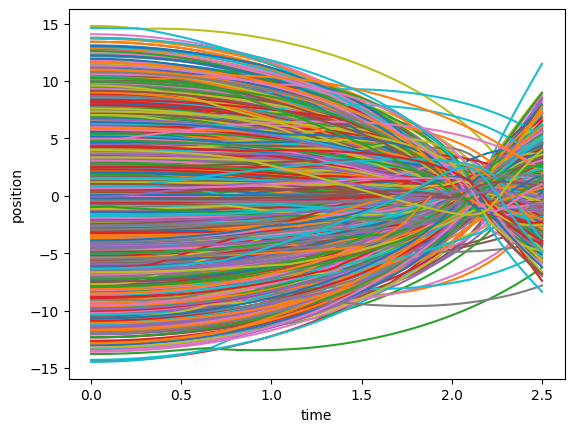

In [7]:
for i in range(n_particles): plt.plot(time, positions[i, :, 0])
plt.ylabel('position')
plt.xlabel('time')
plt.show()

In [8]:
def compute_radius(positions):
    radius = []
    for i in range(n_particles): radius.append(np.sqrt(positions[i, :, 0]**2 + positions[i, :, 1]**2 + positions[i, :, 2]**2))
    radius = np.array(radius)
    return radius

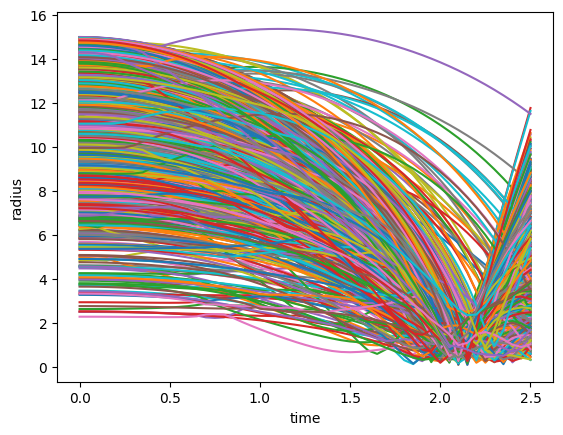

In [9]:
radius = compute_radius(positions)

for i in range(n_particles): plt.plot(time, radius[i])
plt.ylabel('radius')
plt.xlabel('time')
plt.show()

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 389.49it/s]


starting animation


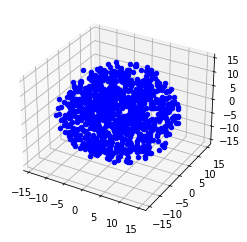

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 539.40it/s]


In [8]:
import matplotlib.animation as animation

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

#ax.add_patch (plt.Circle((0, 0), 8, fill = False))
for i in tqdm(range(n_particles)):
    ax.scatter(positions[i][0][0], positions[i][0][1], positions[i][0][2], color='blue')



print('starting animation')
def update(frame):
    # for each frame, update the data stored on each artist.
    # update the scatter plot:
    ax.cla()
    for i in tqdm(range(n_particles)):
        ax.scatter(positions[i][frame][0], positions[i][frame][1], positions[i][frame][2], marker = 'o')
        ax.set(xlim = [-20, 20], ylim = [-20, 20], zlim = [-20, 20], xlabel='x', ylabel='y', zlabel = 'z')

ani = animation.FuncAnimation(fig, update, snap_number, interval=30)
plt.show()

ani.save(animationname)